In [1]:
#Import dependants
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import us
from pathlib import Path
from datetime import datetime

(to find the full names of the states for shd_df, I had to import "us". To do this, type "pip install us" on a random cell, once installed, delete and then restart kernel to use)

# Data Cleaning
### Preparing for Analysis

In [2]:
CSV1Kpath = Path("Kaggle1DS copy.csv")
CSV2Kpath = Path("Kaggle2DS copy.csv")
CSV3Xpath = Path("SHD copy.csv")
CSV1KR = pd.read_csv(CSV1Kpath)
CSV2KR = pd.read_csv(CSV2Kpath)
CSV3XR = pd.read_csv(CSV3Xpath)

In [3]:
#Data frames
kaggle_1_df = pd.DataFrame(CSV1KR)
kaggle_2_df = pd.DataFrame(CSV2KR)
shd_df = pd.DataFrame(CSV3XR)

### Cleaning Kaggle 1 df

In [4]:
#kaggle_1_df

In [5]:
# Organizing columns in desired order #update: took out address
clean_1_df = pd.DataFrame(kaggle_1_df[["school","type","year","date","time","city","state","urbanrural","race","killed","injured","victims","LONCOD","LATCOD"]])

# Convert "Date" column to datetime
clean_1_df["date"] = pd.to_datetime(clean_1_df["date"])

# Format the 'Date' column for display
clean_1_df["date"] = clean_1_df["date"].dt.strftime('%m/%d/%Y')

# Renaming the columns
clean_1_df.rename(columns={"urbanrural": "City Type", "LONCOD": "Longitude","LATCOD": "Latitude"}, inplace=True)

# Proper case the columns
clean_1_df.columns = [col.title() if col.islower() else col for col in clean_1_df]

# Proper case the rows
clean_1_df = clean_1_df.map(lambda x: x.title() if isinstance(x, str) else x)

# Replace NaN with "Unknown"
clean_1_df = clean_1_df.fillna("Unknown")


# Adding the newly labeled data into a new csv for cleanliness
clean_1_path = Path("clean 1.csv")
clean_1_df.to_csv(clean_1_path, index=False)

clean_1_df

/var/folders/gx/940qgss5321_lvwt8pt67nbh0000gn/T/ipykernel_1552/1336190012.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  clean_1_df["date"] = pd.to_datetime(clean_1_df["date"])


,School,Type,Year,Date,Time,City,State,City Type,Race,Killed,Injured,Victims,Longitude,Latitude
0,William Penn High School,High School,2009,01/08/2009,8:30Pm,New Castle,Delaware,Suburbtown,Black,0,1,1,-75.5849,39.6681
1,Dunbar Vocational Career Academy,High School,2009,01/09/2009,8:00Pm,Chicago,Illinois,Urban,Black,0,5,5,-87.6175,41.8399
2,Cahokia High School,High School,2009,01/23/2009,7:20Pm,Cahokia,Illinois,Suburbtown,Black,1,0,1,-90.1651,38.5657
3,Zebulon Middle School,Middle School,2009,02/11/2009,6:00Am,Zebulon,North Carolina,Suburbtown,Black,0,1,1,-78.3118,35.8315
4,Central High School,High School,2009,02/17/2009,2:20Pm,Detroit,Michigan,Urban,Unknown,0,1,1,-83.113977,42.383593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Denali Elementary School,Elementary School,2018,10/03/2018,9:30Am,Anchorage,Alaska,Urban,White,0,1,1,-149.881113,61.213281
176,Varina High School,High School,2018,10/07/2018,9:30Pm,Henrico,Virginia,Rural,Black,0,1,1,-77.378427,37.471892
177,Butler High School,High School,2018,10/29/2018,7:15Am,Matthews,North Carolina,Suburbtown,White,1,0,1,-80.691593,35.120282
178,Simonsdale Elementary School,Elementary School,2018,11/20/2018,4:00Pm,Portsmouth,Virginia,Urban,White,0,1,1,-76.382449,36.826811


### Cleaning Kaggle 2 df

In [6]:
#kaggle_2_df

In [7]:
# Organizing available columns in desired order
clean_2_df = pd.DataFrame(kaggle_2_df[["school","year","date","time","city","state","killed","injured","long","lat","weapon",
                                       "weapon_source","age_shooter1","gender_shooter1","race_ethnicity_shooter1","shooter_relationship1"]])

# Convert "Date" column to datetime
clean_2_df["date"] = pd.to_datetime(clean_2_df["date"])

# Format the 'Date' column for display
clean_2_df["date"] = clean_2_df["date"].dt.strftime("%m/%d/%Y")

# Renaming the columns
clean_2_df.rename(columns={"long": "Longitude","lat": "Latitude","weapon_source":"Weapon Source", "age_shooter1":"Age",
                           "race_ethnicity_shooter1":"Race",}, inplace=True)

# Proper case the columns
clean_2_df.columns = [col.title() if col.islower() else col for col in clean_2_df]

# Proper case the rows
clean_2_df = clean_2_df.map(lambda x: x.title() if isinstance(x, str) else x)

# Adding empty columns that match first dataframe
clean_2_df["Type"] = "Unknown"
clean_2_df["City Type"] = "Unknown"
clean_2_df["Race"] = "Unknown"
clean_2_df["Victims"] = "Unknown"
clean_2_df["Bullied"] = "Unknown"
clean_2_df["Domestic Violence"] = "Unknown"
clean_2_df["Gang Related"] = "Unknown"
clean_2_df["Preplanned"] = "Unknown"
clean_2_df["Location"] = "Unknown"


# Extract school type from the 'School' column and put it in the 'Type' column
clean_2_df.loc[clean_2_df["School"].str.contains("High School", case=False, na=False), "Type"] = "High School"
clean_2_df.loc[clean_2_df["School"].str.contains("Middle School", case=False, na=False), "Type"] = "Middle School"
clean_2_df.loc[clean_2_df["School"].str.contains("Elementary School", case=False, na=False), "Type"] = "Elementary School"
clean_2_df.loc[clean_2_df["School"].str.contains("Junior High", case=False, na=False), "Type"] = "Middle School"


# Rearranging new columns and the first dataframe into desired order
clean_2_df = pd.DataFrame(clean_2_df[["School","Type","Year","Date","Time","City","State","City Type","Race","Killed","Injured",
                                      "Victims","Longitude","Latitude","Bullied","Domestic Violence","Gang Related","Preplanned",
                                      "Weapon","Weapon Source","Age","Gender_Shooter1","Shooter_Relationship1"]])

# Replace NaN with "Unknown"
clean_2_df = clean_2_df.fillna("Unknown")

# Adding the newly labeled data into a new csv for cleanliness
clean_2_path = Path("clean 2.csv")
clean_2_df.to_csv(clean_2_path, index=False)

clean_2_df

,School,Type,Year,Date,Time,City,State,City Type,Race,Killed,...,Latitude,Bullied,Domestic Violence,Gang Related,Preplanned,Weapon,Weapon Source,Age,Gender_Shooter1,Shooter_Relationship1
0,Columbine High School,High School,1999,04/20/1999,11:19 Am,Littleton,Colorado,Unknown,Unknown,13,...,39.60391,Unknown,Unknown,Unknown,Unknown,12-Gauge Savage-Springfield 67H Pump-Action Sh...,Purchased From Friends,18.0,M,Student
1,Scotlandville Middle School,Middle School,1999,04/22/1999,12:30 Pm,Baton Rouge,Louisiana,Unknown,Unknown,0,...,30.529958,Unknown,Unknown,Unknown,Unknown,.22 Caliber Pistol,Unknown,14.0,M,Former Student (Expelled)
2,Heritage High School,High School,1999,05/20/1999,8:03 Am,Conyers,Georgia,Unknown,Unknown,0,...,33.626922,Unknown,Unknown,Unknown,Unknown,".22 Caliber Rifle, 357-Caliber Magnum Handgun",Unknown,15.0,M,Student
3,John Bartram High School,High School,1999,10/04/1999,10:00 Am,Philadelphia,Pennsylvania,Unknown,Unknown,0,...,39.921509,Unknown,Unknown,Unknown,Unknown,Rg .25-Caliber Pistol,Purchased From Friend,17.0,M,Student
4,Dorchester High School,High School,1999,11/03/1999,7:40 Am,Boston,Massachusetts,Unknown,Unknown,0,...,42.285268,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,M,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,E. Washington Rhodes Elementary School,Elementary School,2023,05/08/2023,11:30 Am,Philadelphia,Pennsylvania,Unknown,Unknown,0,...,40.0028,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Student
383,Roosevelt High School,High School,2023,05/17/2023,2:25 Pm,Washington,District Of Columbia,Unknown,Unknown,1,...,38.942971,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
384,St. John'S Prep,Unknown,2023,05/22/2023,Unknown,Danvers,Massachusetts,Unknown,Unknown,0,...,42.582682,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,M,Police Officer
385,Oliver Citywide Academy,Unknown,2023,05/24/2023,7:30 Am,Pittsburgh,Pennsylvania,Unknown,Unknown,1,...,40.464327,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,15.0,M,Student


In [8]:
clean_2_df["Killed"].value_counts()

Killed
0     298
1      71
2       7
4       2
13      1
7       1
5       1
3       1
26      1
17      1
10      1
21      1
6       1
Name: count, dtype: int64

### Cleaning shd_df

In [9]:
#shd_df

In [12]:
# Organizing available columns in desired order
clean_3_df = pd.DataFrame(shd_df[["School","School_Level","Date","City","State","First Shot","Bullied","Domestic Violence","Gang Related","Preplanned","Quarter","Location"]])

# Convert "Date" column to datetime
clean_3_df["Date"] = pd.to_datetime(clean_3_df["Date"])

# Create the "Year" column by extracting the year from the "Date" column
clean_3_df['Year'] = clean_3_df['Date'].dt.year

# Format the 'Date' column for display
clean_3_df["Date"] = clean_3_df["Date"].dt.strftime('%m/%d/%Y')

# Renaming the columns
clean_3_df.rename(columns={"School_Level": "Type","First Shot": "Time"}, inplace=True)

# Proper case the columns
clean_3_df.columns = [col.title() if col.islower() else col for col in clean_3_df]

# Adding empty columns that match first dataframe
clean_3_df["City Type"] = ""
clean_3_df["Race"] = "Unknown"
clean_3_df["Killed"] = ""
clean_3_df["Injured"] = "Unknown"
clean_3_df["Victims"] = "Unknown"
clean_3_df["Longitude"] = ""
clean_3_df["Latitude"] = ""
clean_3_df["Weapon"] = "Unknown"
clean_3_df["Weapon Source"] = "Unknown"
clean_3_df["Age"] = "Unknown"
clean_3_df["Gender_Shooter1"] = "Unknown"
clean_3_df["Shooter_Relationship1"] = "Unknown"

#"weapon", "weapon_source","age_shooter1","gender_shooter1","race_ethnicity_shooter1","shooter_relationship1"

# Extract school type from the 'School' column and put it in the 'Type' column
clean_3_df.loc[clean_3_df["School"].str.contains("High School", case=False, na=False), "Type"] = "High School"
clean_3_df.loc[clean_3_df["School"].str.contains("Middle School", case=False, na=False), "Type"] = "Middle School"
clean_3_df.loc[clean_3_df["School"].str.contains("Elementary School", case=False, na=False), "Type"] = "Elementary School"
clean_3_df.loc[clean_3_df["School"].str.contains("Junior High", case=False, na=False), "Type"] = "Middle School"

# Map state abbreviations to full state names using us package
def get_full_state_name(abbrev):
    try:
        return us.states.lookup(abbrev).name
    except AttributeError:
        return abbrev

clean_3_df["State"] = clean_3_df["State"].apply(get_full_state_name)

# Rearranging new columns and the first dataframe into desired order
clean_3_df = pd.DataFrame(clean_3_df[["School","Type","Year","Date","Time","City","State","City Type","Race","Killed","Injured",
                                      "Victims","Longitude","Latitude","Bullied","Domestic Violence","Gang Related","Preplanned",
                                      "Weapon","Weapon Source","Age","Gender_Shooter1","Shooter_Relationship1","Location"]])

# Replace NaN with "Unknown"
clean_3_df = clean_3_df.fillna("Unknown")

# Adding the newly labeled data into a new csv for cleanliness
clean_3_path = Path("clean 3.csv")
clean_3_df.to_csv(clean_3_path, index=False)

clean_3_df

,School,Type,Year,Date,Time,City,State,City Type,Race,Killed,...,Bullied,Domestic Violence,Gang Related,Preplanned,Weapon,Weapon Source,Age,Gender_Shooter1,Shooter_Relationship1,Location
0,Hine Junior High School,Middle School,1970,01/05/1970,Unknown,Washington,DC,,Unknown,,...,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown,Inside School Building
1,Sousa Junior High,Middle School,1970,01/05/1970,Unknown,Washington,DC,,Unknown,,...,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown,Hallway
2,Unnamed High School,High School,1970,01/05/1970,Unknown,Washington,DC,,Unknown,,...,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown,Playground
3,John F. Kennedy High School,High School,1970,02/06/1970,Unknown,Cleveland,Ohio,,Unknown,,...,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown,Hallway
4,David Starr Jordan High School,High School,1970,03/23/1970,Unknown,Long Beach,California,,Unknown,,...,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown,Beside Building
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,Little Rock School District Bus,Other,2022,06/08/2022,16:01:00,Little Rock,Arkansas,,Unknown,,...,No,No,Unknown,No,Unknown,Unknown,Unknown,Unknown,Unknown,School Bus
2065,Walnut Park Elementary School,Elementary School,2022,06/09/2022,09:30:00,Gadsden,Alabama,,Unknown,,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Front of School
2066,Byhalia High School,High School,2022,06/10/2022,10:30:00,Byhalia,Mississippi,,Unknown,,...,No,No,Unknown,No,Unknown,Unknown,Unknown,Unknown,Unknown,Parking Lot
2067,Mariner High School,High School,2022,06/13/2022,15:10:00,Everett,Washington,,Unknown,,...,No,No,Unknown,No,Unknown,Unknown,Unknown,Unknown,Unknown,Parking Lot


In [13]:
clean_3_df.columns

Index(['School', 'Type', 'Year', 'Date', 'Time', 'City', 'State', 'City Type',
       'Race', 'Killed', 'Injured', 'Victims', 'Longitude', 'Latitude',
       'Bullied', 'Domestic Violence', 'Gang Related', 'Preplanned', 'Weapon',
       'Weapon Source', 'Age', 'Gender_Shooter1', 'Shooter_Relationship1',
       'Location'],
      dtype='object')

### Merging Data Frames

In [91]:
# Merging dfs
merged_df = pd.merge(clean_1_df, clean_2_df, on=["School","Type","Year","Date","Time","City","State","City Type","Race","Injured","Longitude","Latitude"], how="right") 
final_df = pd.merge(merged_df, clean_3_df, on=["School","Type","Year","Date","Time","City","State","City Type","Race","Longitude","Latitude"], how="right")

# Selecting only the desired columns
'''final_df = final_df[["School","Type","Year","Date","Time","City","State","City Type","Race","Killed_y","Injured_y","Victims","Longitude","Latitude","Bullied","Domestic Violence","Gang Related","Preplanned",
                                      "Weapon","Weapon Source","Age","Gender_Shooter1","Shooter_Relationship1"]]'''

# Renaming the columns
#final_df.rename(columns={"Killed_y": "Killed","Injured_y":"Injured"}, inplace=True)

final_df

,School,Type,Year,Date,Time,City,State,City Type,Race,Killed_x,...,Victims,Bullied_y,Domestic Violence_y,Gang Related_y,Preplanned_y,Weapon_y,Weapon Source_y,Age_y,Gender_Shooter1_y,Shooter_Relationship1_y
0,Hine Junior High School,Middle School,1970,01/05/1970,Unknown,Washington,DC,,Unknown,NaN,...,Unknown,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown
1,Sousa Junior High,Middle School,1970,01/05/1970,Unknown,Washington,DC,,Unknown,NaN,...,Unknown,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown
2,Unnamed High School,High School,1970,01/05/1970,Unknown,Washington,DC,,Unknown,NaN,...,Unknown,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown
3,John F. Kennedy High School,High School,1970,02/06/1970,Unknown,Cleveland,Ohio,,Unknown,NaN,...,Unknown,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown
4,David Starr Jordan High School,High School,1970,03/23/1970,Unknown,Long Beach,California,,Unknown,NaN,...,Unknown,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,Little Rock School District Bus,Other,2022,06/08/2022,16:01:00,Little Rock,Arkansas,,Unknown,NaN,...,Unknown,No,No,Unknown,No,Unknown,Unknown,Unknown,Unknown,Unknown
2065,Walnut Park Elementary School,Elementary School,2022,06/09/2022,09:30:00,Gadsden,Alabama,,Unknown,NaN,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2066,Byhalia High School,High School,2022,06/10/2022,10:30:00,Byhalia,Mississippi,,Unknown,NaN,...,Unknown,No,No,Unknown,No,Unknown,Unknown,Unknown,Unknown,Unknown
2067,Mariner High School,High School,2022,06/13/2022,15:10:00,Everett,Washington,,Unknown,NaN,...,Unknown,No,No,Unknown,No,Unknown,Unknown,Unknown,Unknown,Unknown


In [14]:
# Merging dfs
merged_df = pd.merge(clean_1_df, clean_2_df, on=["School"], how="right") 
final_df = pd.merge(merged_df, clean_3_df, on=["School"])

# Selecting only the desired columns
#final_df = final_df[["School","Type","Year","Date","Time","City","State","City Type","Race","Killed_y","Injured_y","Victims","Longitude","Latitude"]]

# Renaming the columns
#final_df.rename(columns={"Killed_y": "Killed","Injured_y":"Injured"}, inplace=True)

final_df

,School,Type_x,Year_x,Date_x,Time_x,City_x,State_x,City Type_x,Race_x,Killed_x,...,Bullied_y,Domestic Violence_y,Gang Related_y,Preplanned_y,Weapon_y,Weapon Source_y,Age_y,Gender_Shooter1_y,Shooter_Relationship1_y,Location
0,Columbine High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,No,No,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Cafeteria
1,Scotlandville Middle School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown,Beside Building
2,Heritage High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,No,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Hallway
3,Heritage High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,Unknown,No,Unknown,Unknown,Unknown,Unknown,Unknown,Hallway
4,Heritage High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,No,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Hallway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,William Penn High School,High School,2009.0,01/08/2009,8:30Pm,New Castle,Delaware,Suburbtown,Black,0.0,...,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown,Gym
510,Taylorsville High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown,Hallway
511,Palo Duro High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown,Hallway
512,Anniston High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown,Parking Lot


In [15]:
final_df.columns

Index(['School', 'Type_x', 'Year_x', 'Date_x', 'Time_x', 'City_x', 'State_x',
       'City Type_x', 'Race_x', 'Killed_x', 'Injured_x', 'Victims_x',
       'Longitude_x', 'Latitude_x', 'Type_y', 'Year_y', 'Date_y', 'Time_y',
       'City_y', 'State_y', 'City Type_y', 'Race_y', 'Killed_y', 'Injured_y',
       'Victims_y', 'Longitude_y', 'Latitude_y', 'Bullied_x',
       'Domestic Violence_x', 'Gang Related_x', 'Preplanned_x', 'Weapon_x',
       'Weapon Source_x', 'Age_x', 'Gender_Shooter1_x',
       'Shooter_Relationship1_x', 'Type', 'Year', 'Date', 'Time', 'City',
       'State', 'City Type', 'Race', 'Killed', 'Injured', 'Victims',
       'Longitude', 'Latitude', 'Bullied_y', 'Domestic Violence_y',
       'Gang Related_y', 'Preplanned_y', 'Weapon_y', 'Weapon Source_y',
       'Age_y', 'Gender_Shooter1_y', 'Shooter_Relationship1_y', 'Location'],
      dtype='object')

In [16]:
final_df["Location"].value_counts()

Location
Parking Lot                   104
Hallway                        68
Beside Building                62
Classroom                      51
Front of School                36
Bathroom                       27
Cafeteria                      23
Outside on School Property     23
Gym                            21
Inside School Building         20
Football Field/Track           15
Office                         11
Field (General)                10
Off School Property             9
Courtyard                       7
Playground                      6
School Bus                      5
ND                              5
Basketball Court                3
Entryway                        3
Classroom; Beside Building      1
Auditorium                      1
Hallway; Beside Building        1
Classroom; Field                1
Other                           1
Name: count, dtype: int64

In [83]:
final_df["Preplanned_y"].value_counts()

Preplanned_y
No         166
Yes         37
Unknown     16
Name: count, dtype: int64

# Analyzing the Data

In [17]:
# Annual analysis of # of incidents by year
year_school_df = final_df.groupby("Year")

#Count of incidents per year
count_year_incident = year_school_df['Year'].count()

count_year_incident

Year
1970    11
1971     5
1972     1
1973     9
1974     1
1975     5
1977     3
1978     1
1979     1
1980     3
1981     1
1982     3
1984    18
1986     1
1988     5
1989     1
1990     4
1991    11
1992    11
1993     4
1994     1
1995     1
1996     2
1997     3
1998     1
1999    10
2000    10
2001    13
2002     8
2003     8
2004    18
2005    23
2006    19
2007     8
2008    10
2009    20
2010     9
2011     6
2012    11
2013    13
2014    19
2015     6
2016    15
2017    25
2018    41
2019    31
2020    13
2021    44
2022    27
Name: Year, dtype: int64

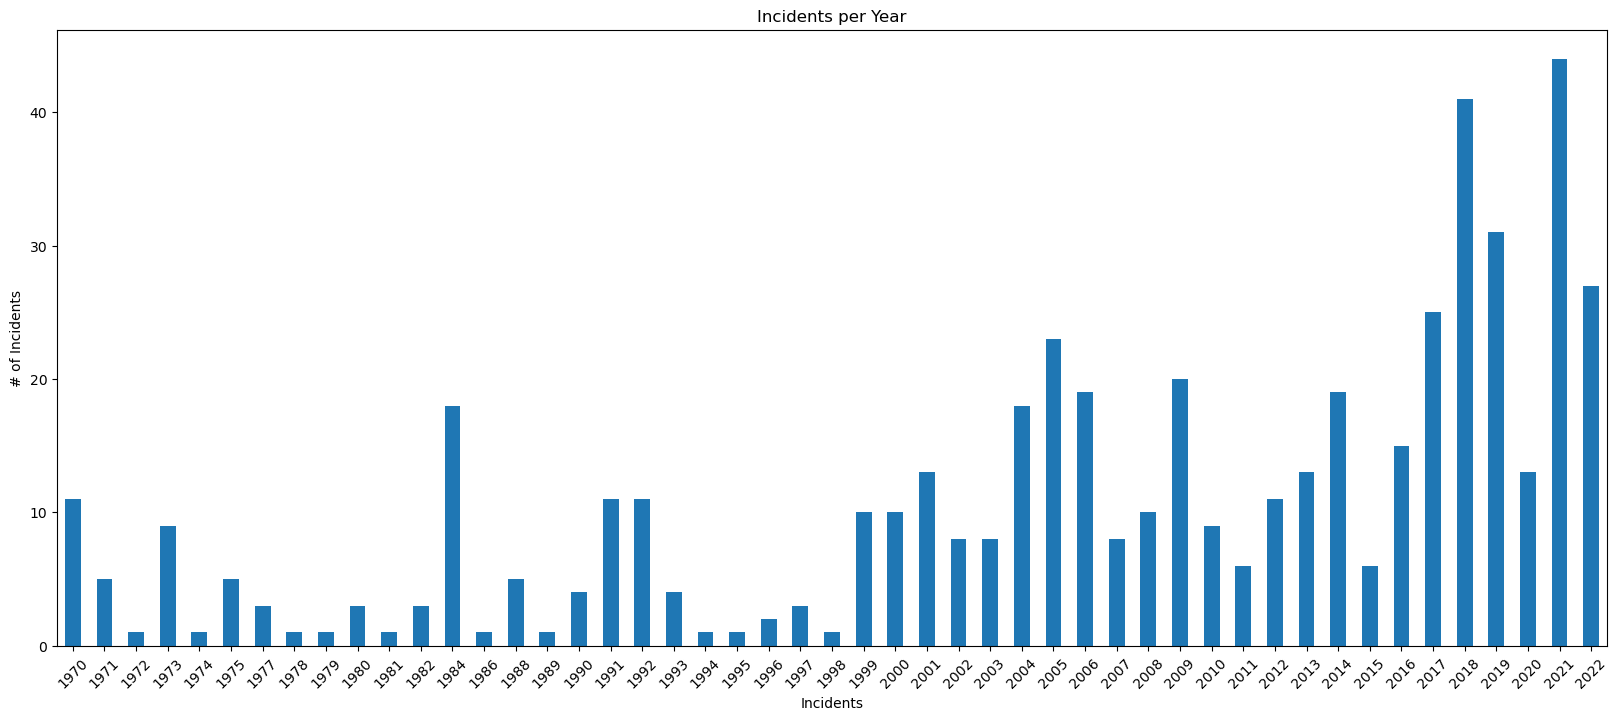

In [18]:
# Create a bar chart
annual_chart = count_year_incident.plot(kind="bar", figsize=(20,8))

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.xlabel("Incidents")
plt.ylabel("# of Incidents")
plt.title("Incidents per Year")

plt.show()